In [ ]:
import pandas as pd
import numpy as np

## Setting DATE column as the index and parse_dates ensures that that it is of type date_time

In [ ]:
df = pd.read_csv("/content/MaunaLoaDailyTemps.csv", index_col = "DATE", parse_dates = True)
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [ ]:
df.dtypes

MinTemp    float64
MaxTemp    float64
AvgTemp    float64
Sunrise      int64
Sunset       int64
dtype: object

In [ ]:
df.isna().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


## We will be predicting the AvgTemp values

<Axes: xlabel='DATE'>

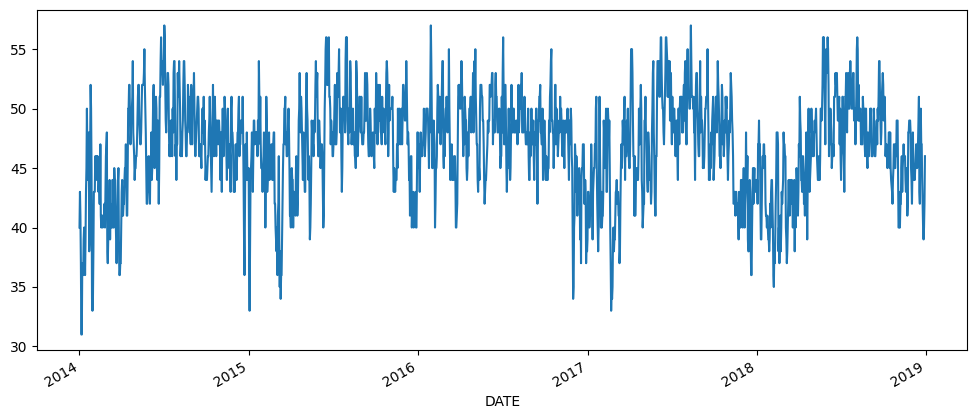

In [ ]:
df["AvgTemp"].plot(figsize = (12, 5))

## Check for stationarity
### dicky-fuller test
### If p-value<0.05:dataset is stationary else it is non stationart

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = "AIC")
  print("1. ADF: ", dftest[0])
  print("2. P-value: ", dftest[1])
  print("3. Num of lags: ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression:", dftest[3])
  print("5. Critical value: ")
  for key, val in dftest[4].items():
    print("\t", key, ":", val)

In [ ]:
ad_test(df["AvgTemp"])

1. ADF:  -6.554680125068777
2. P-value:  8.675937480199653e-09
3. Num of lags:  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical value: 
	 1% : -3.433972018026501
	 5% : -2.8631399192826676
	 10% : -2.5676217442756872


## P-value is less than 0.05 so dataset is stationary

# Now finding the order of AR/I/MA

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00


## The auto_arima function from pmdarima does the work for us by calculating the order values

In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(df["AvgTemp"], trace = True, supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=6.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.94 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=3.82 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=3.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=4.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=4.98 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=4.34 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=4.77 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=6.52 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=5.67 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=6.30 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Sun, 25 Feb 2024   AIC                           8295.034
Time:                        11:16:33   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## So we get an ARIMA model with the best parameters coming out as ARIMA(1,0,5)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

##Split data into training and testing

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


# Train the model

In [ ]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Sun, 25 Feb 2024   AIC                           8156.395
Time:                        11:39:23   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Making predictions
We need to specify the starting and ending indices

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='DATE'>

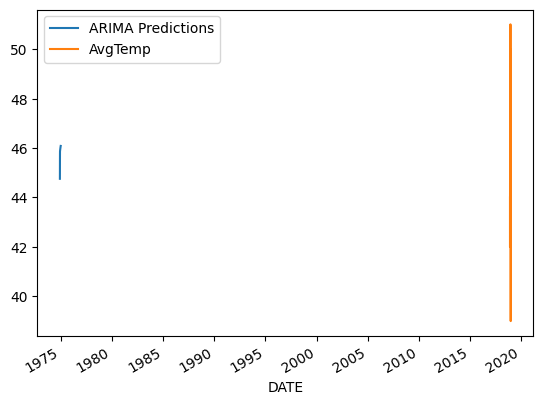

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463825206671


Now we will make predictions for future values, so we fit the model again this time on the whole data

In [ ]:
model2 = ARIMA(df["AvgTemp"], order = (1, 0, 5))
model2 = model2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [ ]:
index_future_dates = pd.date_range(start = "2018-12-30", end = "2019-3-30")
pred = model2.predict(start = len(df), end = len(df) + 90, type = "levels").rename("ARIMA Predictions")
pred.index = index_future_dates
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
                ...    
2019-03-26    46.083939
2019-03-27    46.090159
2019-03-28    46.096291
2019-03-29    46.102338
2019-03-30    46.108300
Freq: D, Name: ARIMA Predictions, Length: 91, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


# These are the predictions for the next 90 days

<Axes: >

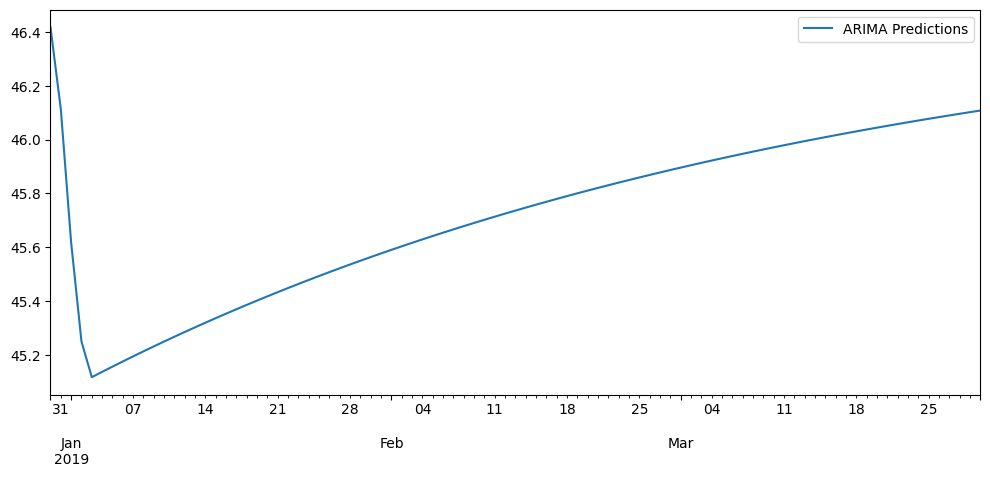

In [ ]:
pred.plot(legend = True, figsize = (12, 5))